# Loan Default EDA & Modeling (Starter)

This notebook walks through the **minimum viable EDA** and a simple baseline model. Feel free to extend plots/insights.


In [2]:
from pathlib import Path
import pandas as pd

# Where your files live (notebook is inside notebooks/, so we go up one level)
train_path = Path('../data/training_loan_data.csv')
test_path  = Path('../data/testing_loan_data.csv')

# Robust CSV loader: skips a notice line if present
def smart_read_csv(p: Path) -> pd.DataFrame:
    with open(p, 'r', encoding='utf-8', errors='ignore') as f:
        first = f.readline()
        second = f.readline()
    # If the second line contains 'bad_flag' (the real header), skip the first line
    return pd.read_csv(p, skiprows=1) if ('bad_flag' in second and 'bad_flag' not in first) else pd.read_csv(p)

# Sanity check the paths, then load
print("Train:", train_path.resolve(), train_path.exists())
print("Test :", test_path.resolve(),  test_path.exists())

df = smart_read_csv(train_path)
df.head()


Train: C:\Users\test1\Documents\GitHub\JPMorgan-take-home-project\data\training_loan_data.csv True
Test : C:\Users\test1\Documents\GitHub\JPMorgan-take-home-project\data\testing_loan_data.csv True


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


## 1) Quick data overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-null  float64
 12  dti                          189457 non-null  float64
 13 

In [4]:
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,199121.0,NaN,NaN,NaN,10098566.911205,57043.972099,10000001.0,10049582.0,10098227.0,10148007.0,10197787.0
member_id,189457.0,NaN,NaN,NaN,5929625.920367,3339821.824345,151536.0,2308792.0,6060627.0,8727745.0,12098992.0
loan_amnt,199121.0,NaN,NaN,NaN,14071.947334,8067.076636,1000.0,8000.0,12000.0,19600.0,35000.0
term,189457,2,36 months,144800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,189457,145,12.12%,9408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,181531,11,10+ years,61648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,189457,5,MORTGAGE,97647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,189457.0,NaN,NaN,NaN,72243.300905,51804.829944,4800.0,45000.0,62000.0,87000.0,7141778.0
desc,82004,80643,Borrower added on 09/05/13 > Debt consolidat...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,189457,13,debt_consolidation,112259,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Target balance & missingness

In [ ]:
df['bad_flag'].value_counts(dropna=False), df['bad_flag'].value_counts(normalize=True)


(bad_flag
 0.0    176329
 1.0     13128
 NaN      9664
 Name: count, dtype: int64,
 bad_flag
 0.0    0.930707
 1.0    0.069293
 Name: proportion, dtype: float64)

In [7]:
miss = df.isna().mean().sort_values(ascending=False)
miss.head(20)

mths_since_last_major_derog    0.835532
desc                           0.588170
mths_since_recent_inq          0.189076
tot_cur_bal                    0.187851
bc_util                        0.094355
percent_bc_gt_75               0.093923
emp_length                     0.088338
total_bc_limit                 0.086174
tot_hi_cred_lim                0.086174
revol_util                     0.049171
dti                            0.048533
member_id                      0.048533
term                           0.048533
home_ownership                 0.048533
int_rate                       0.048533
inq_last_6mths                 0.048533
bad_flag                       0.048533
annual_inc                     0.048533
purpose                        0.048533
id                             0.000000
dtype: float64

## 3) Numeric vs categorical split

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols[:12], cat_cols[:12]

(['id',
  'member_id',
  'loan_amnt',
  'annual_inc',
  'percent_bc_gt_75',
  'bc_util',
  'dti',
  'inq_last_6mths',
  'mths_since_recent_inq',
  'total_bc_limit',
  'mths_since_last_major_derog',
  'tot_hi_cred_lim'],
 ['term',
  'int_rate',
  'emp_length',
  'home_ownership',
  'desc',
  'purpose',
  'revol_util'])

## 4) Simple univariate plots (extend as needed)

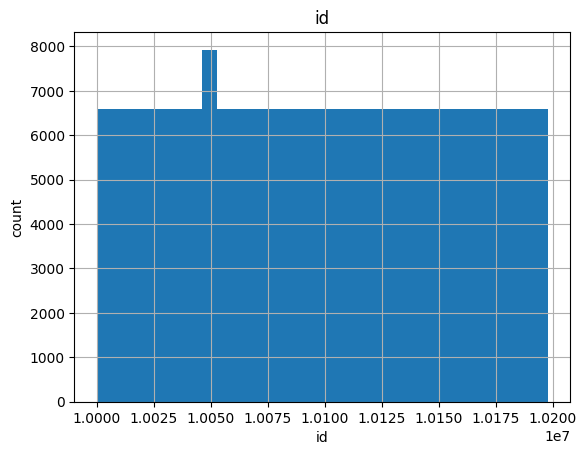

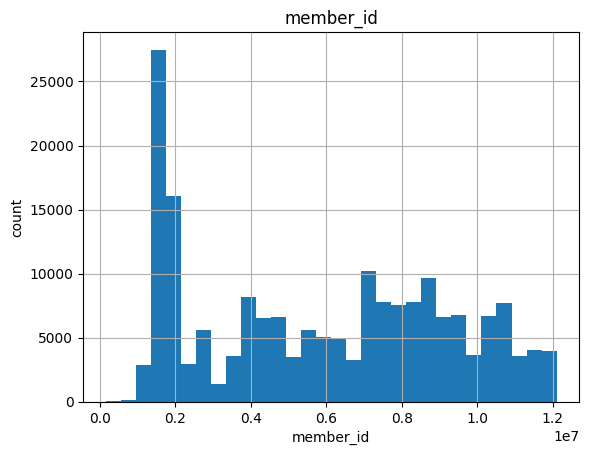

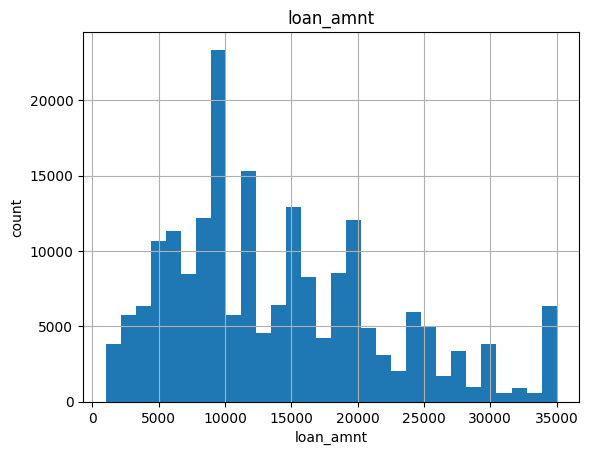

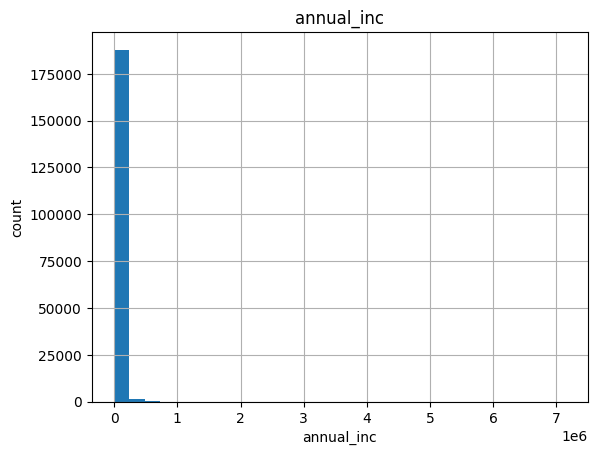

In [ ]:
import matplotlib.pyplot as plt

for c in [c for c in num_cols if c != 'bad_flag'][:4]:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(c)
    plt.xlabel(c); plt.ylabel('count')
    plt.show()


## 5) Basic preprocessing + baseline model (logistic regression)

In [12]:
# ==== Baseline preprocessing + Logistic Regression (full cell) ====

# If df is not already defined, load it robustly from ../data/training_loan_data.csv
try:
    df  # will raise NameError if not defined
except NameError:
    from pathlib import Path
    import pandas as pd

    def smart_read_csv(p: Path) -> pd.DataFrame:
        # Handles a notice line before header (e.g., "Data derived from a public source")
        with open(p, 'r', encoding='utf-8', errors='ignore') as f:
            first = f.readline()
            second = f.readline()
        return pd.read_csv(p, skiprows=1) if ('bad_flag' in second and 'bad_flag' not in first) else pd.read_csv(p)

    train_path = Path('../data/training_loan_data.csv')
    df = smart_read_csv(train_path)

# --- Clean target: coerce to 0/1 and drop invalid/missing rows
import pandas as pd
y_raw = pd.to_numeric(df['bad_flag'], errors='coerce')
mask = y_raw.isin([0.0, 1.0])
dropped = (~mask).sum()
print(f"Dropping rows with invalid/missing bad_flag: {dropped}")

X = df.loc[mask].drop(columns=['bad_flag']).copy()
y = y_raw.loc[mask].astype(int)

# --- Drop obvious non-features if present
for drop_col in ['member_id', 'desc']:
    if drop_col in X.columns:
        X.drop(columns=[drop_col], inplace=True)

# --- Build preprocessing + LR model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
import sklearn

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Handle sklearn version differences for OneHotEncoder param name
def sk_ge(major_req, minor_req):
    parts = sklearn.__version__.split(".")
    try:
        major, minor = int(parts[0]), int(parts[1])
    except Exception:
        major, minor = 1, 3  # safe fallback
    return (major > major_req) or (major == major_req and minor >= minor_req)

if sk_ge(1, 3):
    cat_t = Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ])
else:
    cat_t = Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ])

num_t = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

pre = ColumnTransformer([
    ('num', num_t, num_cols),
    ('cat', cat_t, cat_cols),
])

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = Pipeline([
    ('pre', pre),
    ('lr', LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)
prob = clf.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, prob)
print(f'Validation AUC: {auc:.4f}')
print(classification_report(y_valid, (prob >= 0.5).astype(int)))

# (Optional) quick class balance after filtering
print("Class balance after filtering (counts):")
print(y.value_counts())
print("Class balance after filtering (%):")
print(y.value_counts(normalize=True))



Dropping rows with invalid/missing bad_flag: 9664
Validation AUC: 0.7268
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     35266
           1       0.60      0.00      0.00      2626

    accuracy                           0.93     37892
   macro avg       0.77      0.50      0.48     37892
weighted avg       0.91      0.93      0.90     37892

Class balance after filtering (counts):
bad_flag
0    176329
1     13128
Name: count, dtype: int64
Class balance after filtering (%):
bad_flag
0    0.930707
1    0.069293
Name: proportion, dtype: float64


## 6) Notes & next steps
- Inspect data dictionary for variable meanings.
- Consider dropping ID-like columns (`member_id`, free-text `desc`).
- Try different models or feature engineering.
